In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('smtph_total.csv')
df.head(5)

,Title,Link,Description,Blogger Name,Blogger Link,Post Date,Post Contents
0,"갤럭시 Z 플립과 한 달, 접는 스마트폰의 가치만 남다",https://chitsol.com/entry/galaxy_z_flip_review/,반으로 접을 수 있는 갤럭시 Z 플립이 접지 않는 스마트폰과 얼마나 다른 경험인가를...,https://chitsol.com/,https://chitsol.com/,20210712,NaN
1,스마트폰 삼각대 추천 내돈내산 리뷰,https://blog.naver.com/kimhw1020?Redirect=Log&...,그래서 스마트폰 삼각대 추천 하는 제품을 구매하게 된 것 같아요. 2018년 4월 ...,진돗개 솜이랑 언니랑,https://blog.naver.com/kimhw1020,20210720,\n\n\n\n\n\n\n솜이언니 일상\n\n\n\n\n스마트폰 삼각대 추천 내돈내...
2,귀여운 스마트폰 거치대 + 아이폰 케이스(다이소 비교),https://blog.naver.com/logix200?Redirect=Log&l...,스마트폰 거치대 홀더 &quot;아이폰 케이스도 졸.귀.탱&quot; 안녕하세요. ...,옥희돌이 칩시크족,https://blog.naver.com/logix200,20210802,\n\n\n\n\n\n\n일반 수령기\n\n\n\n\n귀여운 스마트폰 거치대 + 아...
3,"베스틴 원패스 스마트폰 어플, 아이파크 공동 현관문 핸드폰 연동",https://blog.naver.com/july7th73?Redirect=Log&...,"요즘 신축 아파트들은 대부분 IoT 스마트 기기들을 이용한 출입시스템을 도입, 각종...",수연아빠의 야구장 출동 (개포맘모스),https://blog.naver.com/july7th73,20210816,\n\n\n\n\n\n\n파워리뷰즐기기\n\n\n\n\n베스틴 원패스 스마트폰 어플...
4,대전스마트폰복구 삭제나 고장도 걱정없이,https://blog.naver.com/jcy0207?Redirect=Log&lo...,바쁜 현대인들의 곁에서 어디서든 일상을 함께하는 스마트폰은 한순간도 뗄레야 뗄 수 ...,모아의 교육정보 모아모아,https://blog.naver.com/jcy0207,20210609,\n\n안녕하세요 모아입니다.바쁜 현대인들의 곁에서어디서든 일상을 함께하는 스마트폰...


In [3]:
df.columns

Index(['Title', 'Link', 'Description', 'Blogger Name', 'Blogger Link',
       'Post Date', 'Post Contents'],
      dtype='object')

In [4]:
posts = df['Title'] + df['Description']
type(posts)

pandas.core.series.Series

In [5]:
!python3 -m pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 44.9 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [6]:
from konlpy.tag import Okt
tagger = Okt()

In [7]:
stop_words = ['강,', '글,', '애', '미', '번', '은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹', '때', '만', '원', '이때', '개']

In [8]:
posts_noun = []
for post in posts:
  # print(tagger.nouns(post))
  for noun in tagger.nouns(post):
    posts_noun.append(noun)

len(posts_noun)

26085

In [9]:
posts_noun

['갤럭시',
 '플립',
 '달',
 '스마트폰',
 '가치',
 '남',
 '다반',
 '접',
 '수',
 '갤럭시',
 '플립',
 '접지',
 '스마트폰',
 '얼마나',
 '다른',
 '경험',
 '를',
 '여기',
 '조금',
 '관점',
 '기존',
 '스마트폰',
 '기능',
 '유지',
 '것',
 '그냥',
 '의미',
 '스마트폰',
 '삼각대',
 '추천',
 '돈',
 '산',
 '리뷰',
 '스마트폰',
 '삼각대',
 '추천',
 '제품',
 '구매',
 '것',
 '날',
 '결제',
 '이',
 '제품',
 '구매',
 '전',
 '다른',
 '브랜드',
 '스마트폰',
 '삼각대',
 '구매',
 '사용',
 '폰',
 '술',
 '스마트폰',
 '거치',
 '아이폰',
 '케이스',
 '다이소',
 '비교',
 '스마트폰',
 '거치',
 '홀더',
 '아이폰',
 '케이스',
 '졸',
 '귀',
 '얼마',
 '전',
 '제',
 '스마트폰',
 '홀더',
 '정말',
 '캐릭터',
 '추천',
 '알리',
 '개',
 '구매',
 '판매',
 '자가',
 '베스',
 '틴',
 '패스',
 '스마트폰',
 '어플',
 '아이파크',
 '공동',
 '현관문',
 '핸드폰',
 '연동',
 '요즘',
 '신축',
 '아파트',
 '대부분',
 '스마트',
 '기기',
 '이용',
 '출입',
 '시스템',
 '도입',
 '각종',
 '웨어',
 '러블',
 '베스',
 '틴',
 '패스',
 '스마트폰',
 '어플',
 '거실',
 '월',
 '패드',
 '사용',
 '신축',
 '아이파크',
 '거주',
 '계시',
 '패스',
 '대전',
 '스마트폰',
 '복구',
 '삭제',
 '고장',
 '걱정',
 '현대인',
 '곁',
 '어디',
 '서든',
 '일상',
 '스마트폰',
 '한순간',
 '뗄레',
 '수',
 '존재',
 '오늘',
 '여러분',
 '사용',
 '기기',
 '문제',
 '때',
 '스마트폰'

In [10]:
from collections import Counter

In [11]:
noun_counter = Counter(posts_noun)
type(noun_counter)

collections.Counter

In [12]:
top_30_nouns = noun_counter.most_common(30)
type(top_30_nouns)

list

In [13]:
top_nouns_dict = dict(top_30_nouns)
type(top_nouns_dict)

dict

In [14]:
from wordcloud import WordCloud

In [15]:
nouns_wordcloud = WordCloud()

In [16]:
nouns_wordcloud.generate_from_frequencies(top_nouns_dict)

In [17]:
import matplotlib.pyplot as plt

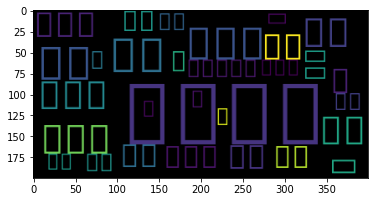

In [18]:
plt.imshow(nouns_wordcloud)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

In [21]:
countvectorizer = CountVectorizer()
countvectorizer.fit_transform(corpus).toarray()

array([[0, 1, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 0]])

In [22]:
print(countvectorizer.vocabulary_)

{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


# Word2Vec

In [23]:
from gensim.models import Word2Vec

In [26]:
word2vec = Word2Vec([posts_noun], min_count=10)
word2vec

In [31]:
word2vec.wv.most_similar('갤럭시')

[('전자', 0.9998472929000854),
 ('출시', 0.999832272529602),
 ('사용', 0.9998217821121216),
 ('것', 0.9998200535774231),
 ('수', 0.9998185038566589),
 ('삼성', 0.9998184442520142),
 ('애플', 0.9998183250427246),
 ('안드로이드', 0.9998132586479187),
 ('를', 0.9998098611831665),
 ('화면', 0.9998077750205994)]

In [ ]:
from sklearn.manifold import TSNE